<a href="https://colab.research.google.com/github/hasanalay/ML/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header = 0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


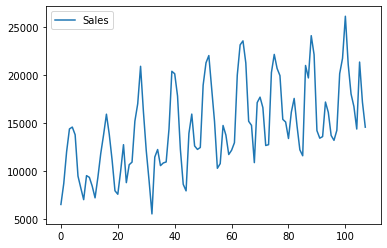

In [ ]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [ ]:
df.dtypes     

Month    object
Sales     int64
dtype: object

In [ ]:
df.columns = ['ds', 'y']                      
df['ds']= pd.to_datetime(df['ds']) 

In [ ]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = list()

for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12792.154485  15807.850227
1 1968-02-01  14905.955964  13277.535299  16604.361268
2 1968-03-01  20842.150502  19263.315098  22468.273985
3 1968-04-01  22870.095215  21214.544439  24487.370348
4 1968-05-01  24176.211162  22638.011899  25717.741562


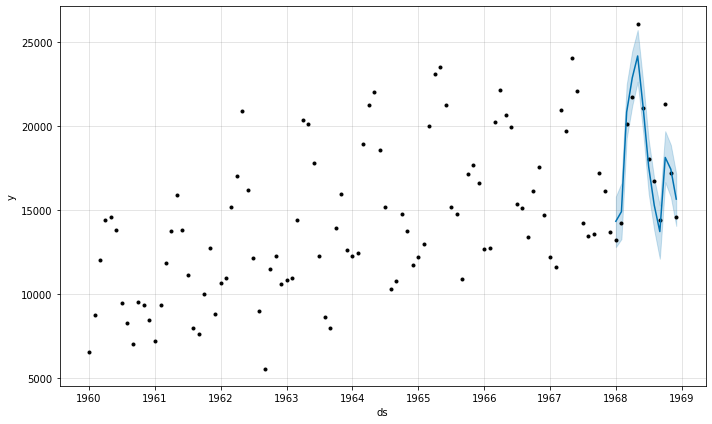

In [ ]:


model.plot(forecast)
pyplot.show()



          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13864.268443  16956.184410
1 1969-02-01  16142.271673  14481.323597  17558.770052
2 1969-03-01  21351.832640  19860.927499  22958.701894
3 1969-04-01  23477.889811  22093.648039  25128.529827
4 1969-05-01  24988.440907  23495.079466  26562.104808


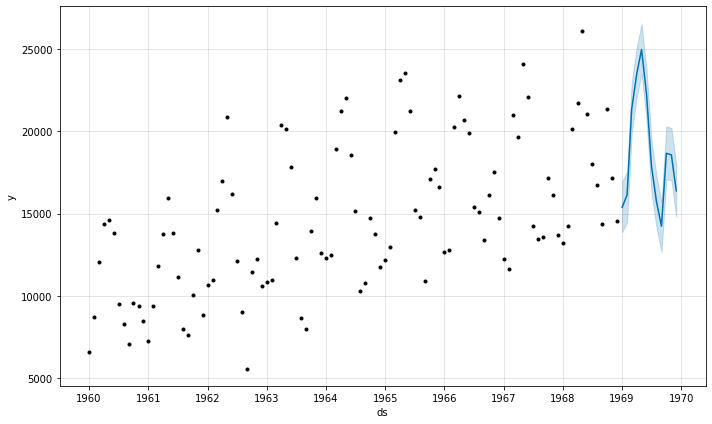

In [ ]:
future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()